In [1]:
%load_ext autoreload

In [2]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [3]:
BASE_PATH = os.path.join(os.getcwd(), "..", "..")
MODULES_PATH = os.path.join(BASE_PATH, "modules")
METRICS_PATH = os.path.join(BASE_PATH, "metrics")
STAT_PATH = os.path.join(BASE_PATH, "stats", "local")

In [4]:
sys.path.append(MODULES_PATH)
sys.path.append(os.path.join(BASE_PATH, "tf_al"))

In [5]:
%autoreload 2
from tf_al import ExperimentSuitMetrics
from utils import MetricsTransformer, Frame, ExperimentFrame, FrameScores, Stats

In [6]:
dtypes = {
    "run": int,
    "iteration": int,
    "train_time": float,
    "eval_sparse_categorical_crossentropy": float,
    "eval_sparse_categorical_accuracy": float,
    "query_time": float,
    "labeled_pool_size": int,
    "unlabeled_pool_size": int,
    "method": str
}

In [7]:
base_experiment_path = os.path.join(METRICS_PATH, "mnist_local")
metrics_handler = ExperimentSuitMetrics(base_experiment_path)
df_mc = MetricsTransformer.load_from_dir(metrics_handler, "mc_dropout", dtype=dtypes)
scores = FrameScores(accuracy_column="eval_sparse_categorical_accuracy")
mc_frame = ExperimentFrame(df_mc, scores=scores)

/home/exleonem/.anaconda/envs/active_learning/lib/python3.8/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [8]:
df_mp = MetricsTransformer.load_from_dir(metrics_handler, "moment_propagation", dtype=dtypes)
scores = FrameScores(accuracy_column="eval_sparse_categorical_accuracy")
mp_frame = ExperimentFrame(df_mp, scores=scores)

In [9]:
from utils import load_gal, plot_gal, plot_gal_sub, plot_mean_frame

In [10]:
df_gal_data = load_gal()

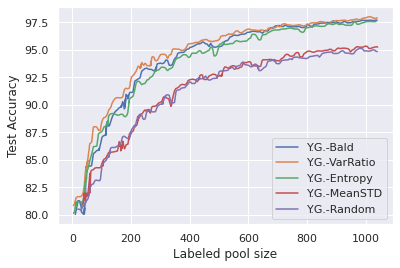

<Figure size 432x288 with 0 Axes>

In [11]:
plot_gal_sub(df_gal_data)
plt.legend()
plt.xlabel("Labeled pool size")
plt.ylabel("Test Accuracy")
plt.show()
plt.savefig(os.path.join(STAT_PATH, "y_gal_mnist_acc.png"))

In [12]:
def compare_results(
    df, 
    from_methods=["Bald", "Entropy"], 
    to_methods=["BALD", "Max. Entropy"],
    acc_limit=80,
    acc_key="eval_sparse_categorical_accuracy"
):
    df[acc_key] = df[acc_key]*100
    acc_sel = df[acc_key] > acc_limit
    df = df[acc_sel]
    
    plot_gal_sub(df_gal_data, from_methods)
    plot_mean_frame(df, columns=to_methods, prefix="M.S.-")
    plt.legend(loc="right", bbox_to_anchor=(1, .5))
    plt.xlabel("Labeled pool size")
    plt.ylabel("Test Accuracy")

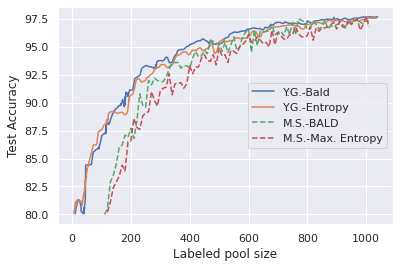

In [13]:
compare_results(mc_frame.get_mean_frame().copy())
plt.savefig(os.path.join(STAT_PATH, "comparison_y_gal_mc_dropout.png"))

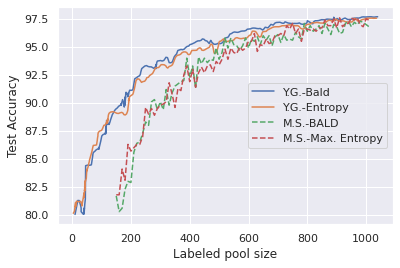

In [14]:
compare_results(mp_frame.get_mean_frame().copy())
plt.savefig(os.path.join(STAT_PATH, "comparison_y_gal_mp.png"))

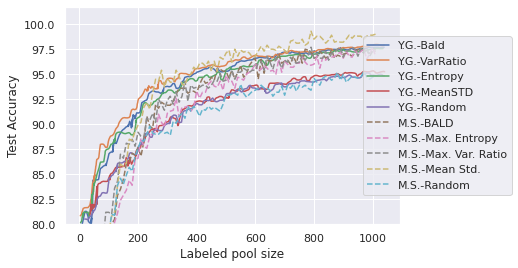

In [19]:
df_mc_mean = mc_frame.get_mean_frame()
df_mc_mean["eval_sparse_categorical_accuracy"] = df_mc_mean["eval_sparse_categorical_accuracy"]*100

plot_gal_sub(df_gal_data)
plot_mean_frame(df_mc_mean, prefix="M.S.-")
plt.legend(loc="right", bbox_to_anchor=(1.35, 0.5))
plt.xlabel("Labeled pool size")
plt.ylabel("Test Accuracy")
plt.ylim(80)
#plt.tight_layout()
plt.savefig(os.path.join(STAT_PATH, "comparison_y_gal_mc_dropout_full.png"), bbox_inches="tight")

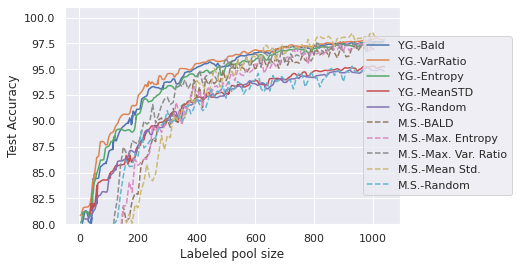

In [23]:
df_mp_mean = mp_frame.get_mean_frame()
df_mp_mean["eval_sparse_categorical_accuracy"] = df_mp_mean["eval_sparse_categorical_accuracy"]*100

plot_gal_sub(df_gal_data)
plot_mean_frame(df_mp_mean, prefix="M.S.-")
plt.legend(loc="right", bbox_to_anchor=(1.35, 0.5))
plt.xlabel("Labeled pool size")
plt.ylabel("Test Accuracy")
plt.ylim(80)

plt.savefig(os.path.join(STAT_PATH, "comparison_y_gal_mp_full.png"), bbox_inches="tight")